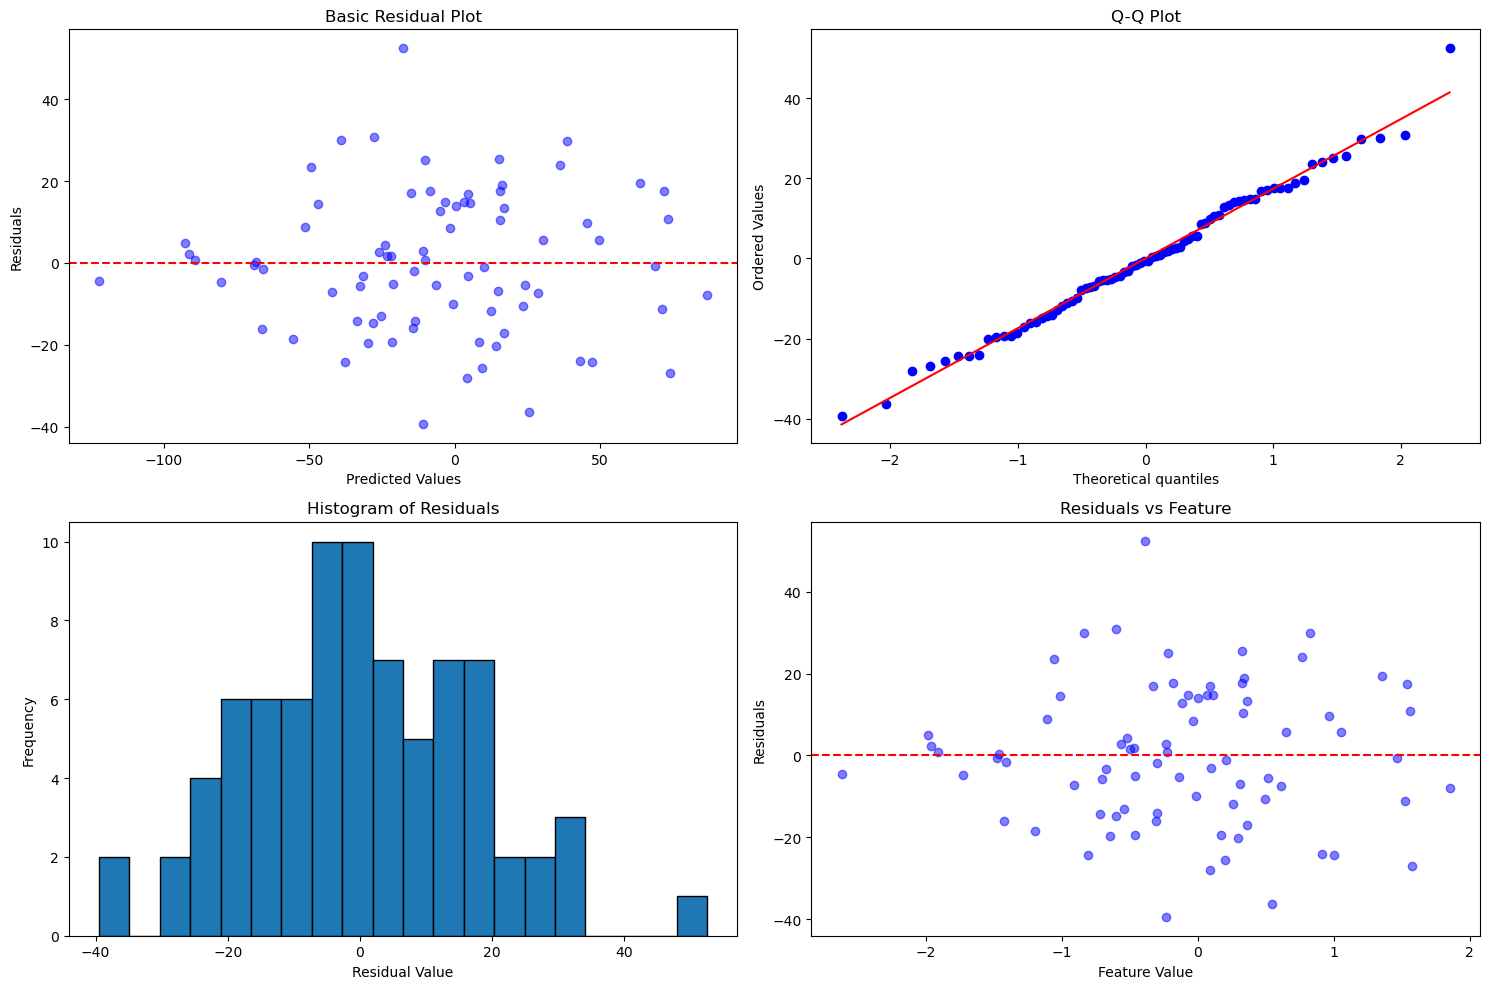


Residual Analysis:
Mean of residuals: 0.0000
Standard deviation of residuals: 17.0789
Skewness of residuals: 0.1838
Kurtosis of residuals: 0.0243

Breusch-Pagan test:
Chi-square value: 80.9712
p-value: 0.0000


In [1]:
#example of different types of residual plots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Create figure with subplots
plt.figure(figsize=(15, 10))

# 1. Basic Residual Plot
plt.subplot(2, 2, 1)
plt.scatter(y_pred_train, residuals_train, c='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Basic Residual Plot')

# 2. Q-Q Plot for Normality Check
from scipy import stats
plt.subplot(2, 2, 2)
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('Q-Q Plot')

# 3. Histogram of Residuals
plt.subplot(2, 2, 3)
plt.hist(residuals_train, bins=20, edgecolor='black')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# 4. Residuals vs Feature
plt.subplot(2, 2, 4)
plt.scatter(X_train, residuals_train, c='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Feature Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Feature')

plt.tight_layout()
plt.show()

# Additional analysis
print("\nResidual Analysis:")
print(f"Mean of residuals: {np.mean(residuals_train):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals_train):.4f}")
print(f"Skewness of residuals: {stats.skew(residuals_train):.4f}")
print(f"Kurtosis of residuals: {stats.kurtosis(residuals_train):.4f}")

# Perform Breusch-Pagan test for heteroscedasticity
from scipy import stats

def breusch_pagan_test(features, residuals):
    """Perform Breusch-Pagan test for heteroscedasticity"""
    residuals_squared = residuals ** 2
    model = LinearRegression()
    model.fit(features, residuals_squared)
    fitted = model.predict(features)
    
    chi_sq = np.sum((residuals_squared - np.mean(residuals_squared)) ** 2 / (2 * np.mean(residuals_squared) ** 2))
    p_value = 1 - stats.chi2.cdf(chi_sq, df=features.shape[1])
    
    return chi_sq, p_value

chi_sq, p_value = breusch_pagan_test(X_train, residuals_train)
print(f"\nBreusch-Pagan test:")
print(f"Chi-square value: {chi_sq:.4f}")
print(f"p-value: {p_value:.4f}")

Linear Model Metrics:
MSE: 1.9360
R²: 0.6147

Polynomial Model Metrics:
MSE: 0.0325
R²: 0.9935

Residual Statistics:
Linear Model:
Mean residuals: -0.0000
Std residuals: 1.3914

Polynomial Model:
Mean residuals: 0.0000
Std residuals: 0.1802


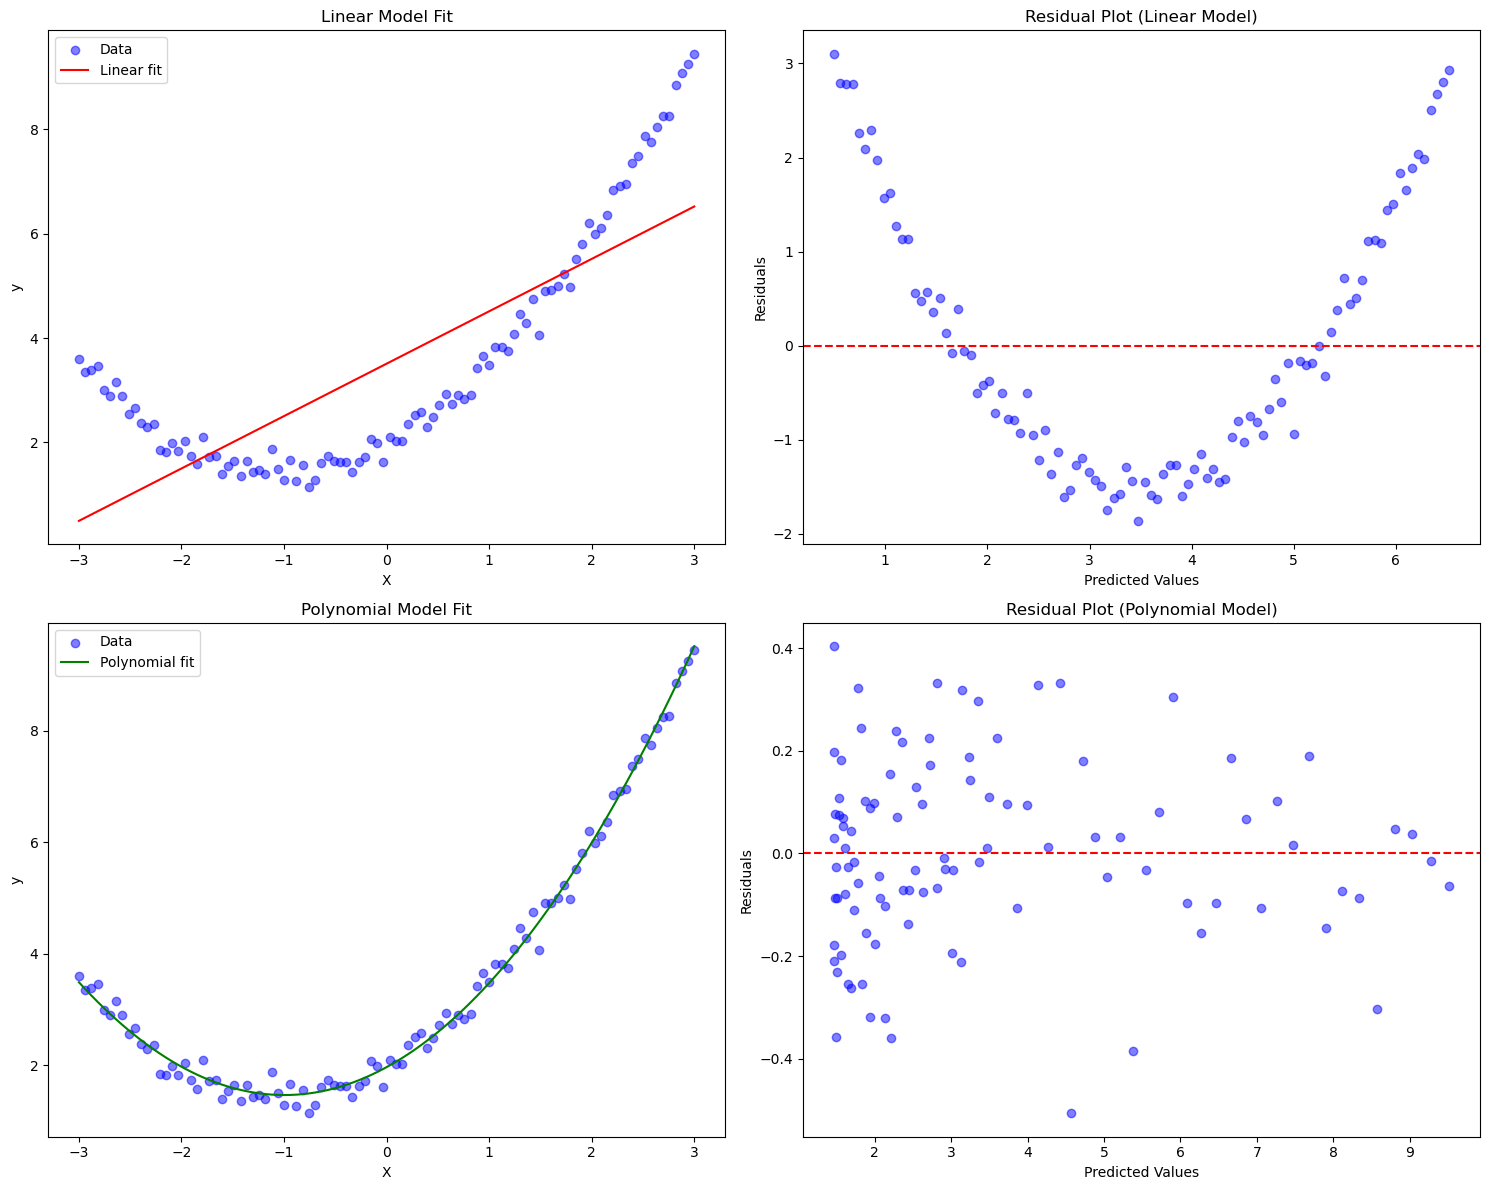

In [2]:
#usage of polynomial feature

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate non-linear data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X.ravel()**2 + X.ravel() + 2 + np.random.normal(0, 0.2, 100)

# Fit linear model first
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Calculate residuals for linear model
residuals_linear = y - y_pred_linear

# Create polynomial model
poly_model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
poly_model.fit(X, y)
y_pred_poly = poly_model.predict(X)

# Calculate residuals for polynomial model
residuals_poly = y - y_pred_poly

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Original data with linear fit
axes[0, 0].scatter(X, y, color='blue', alpha=0.5, label='Data')
axes[0, 0].plot(X, y_pred_linear, color='red', label='Linear fit')
axes[0, 0].set_title('Linear Model Fit')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('y')
axes[0, 0].legend()

# Plot 2: Residual plot for linear model
axes[0, 1].scatter(y_pred_linear, residuals_linear, color='blue', alpha=0.5)
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_title('Residual Plot (Linear Model)')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')

# Plot 3: Data with polynomial fit
axes[1, 0].scatter(X, y, color='blue', alpha=0.5, label='Data')
axes[1, 0].plot(X, y_pred_poly, color='green', label='Polynomial fit')
axes[1, 0].set_title('Polynomial Model Fit')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('y')
axes[1, 0].legend()

# Plot 4: Residual plot for polynomial model
axes[1, 1].scatter(y_pred_poly, residuals_poly, color='blue', alpha=0.5)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_title('Residual Plot (Polynomial Model)')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')

plt.tight_layout()

# Print some metrics
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Model Metrics:")
print(f"MSE: {mean_squared_error(y, y_pred_linear):.4f}")
print(f"R²: {r2_score(y, y_pred_linear):.4f}")
print("\nPolynomial Model Metrics:")
print(f"MSE: {mean_squared_error(y, y_pred_poly):.4f}")
print(f"R²: {r2_score(y, y_pred_poly):.4f}")

# Show residual statistics
print("\nResidual Statistics:")
print("Linear Model:")
print(f"Mean residuals: {np.mean(residuals_linear):.4f}")
print(f"Std residuals: {np.std(residuals_linear):.4f}")
print("\nPolynomial Model:")
print(f"Mean residuals: {np.mean(residuals_poly):.4f}")
print(f"Std residuals: {np.std(residuals_poly):.4f}")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\vyshn\Downloads\archive\Instagram data.csv', encoding='latin')

In [5]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [6]:
df.isna().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


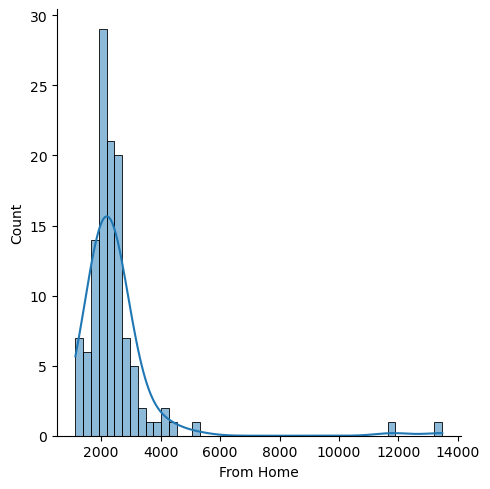

In [8]:
sns.displot(df['From Home'], kde=True)

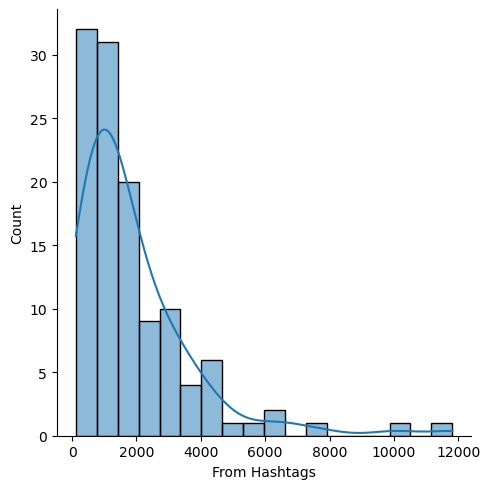

In [9]:
sns.displot(df['From Hashtags'], kde=True)

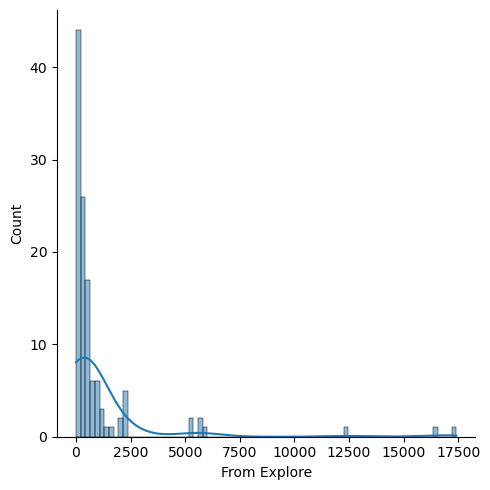

In [14]:
sns.displot(df['From Explore'], kde=True)

percentage of impressions I get from various sources on Instagram:



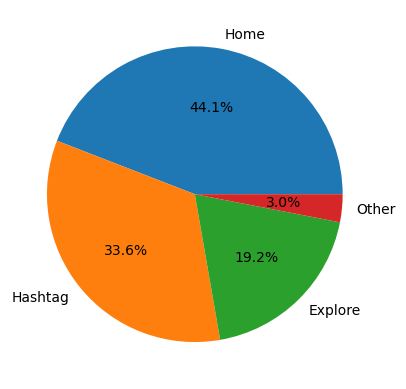

In [37]:
data = [df['From Home'].sum(),df['From Hashtags'].sum(),df['From Explore'].sum(),df['From Other'].sum()]
plt.pie(data=df, x=data, labels=['Home', 'Hashtag','Explore','Other'], autopct='%1.1f%%')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score
import numpy as np

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Create the model and scoring dictionary as you specified
rf = RandomForestClassifier(n_estimators=100)
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')
}

# Perform cross-validation
results = cross_validate(rf, X, y, cv=5, scoring=scoring, return_train_score=True, n_jobs=-1)

In [42]:
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.228278,0.008507,0.925,1.0,0.925383,1.0,0.925,1.0
1,0.227861,0.008513,0.905,1.0,0.905365,1.0,0.905,1.0
2,0.323566,0.009647,0.895,1.0,0.901790,1.0,0.895,1.0
3,0.322567,0.008626,0.895,1.0,0.895040,1.0,0.895,1.0
4,0.307807,0.009747,0.865,1.0,0.865329,1.0,0.865,1.0


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
# Classification example

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200]}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# This will use accuracy by default

# # Regression example
# reg = LinearRegression()
# param_grid = {'fit_intercept': [True, False]}
# grid_search = GridSearchCV(reg, param_grid, cv=5)

# # This will use r2 by default

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200]}, scoring='accuracy')

In [61]:
grid_search.best_score_

0.9028571428571428

In [62]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [67]:
y_pred = grid_search.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.8633333333333333

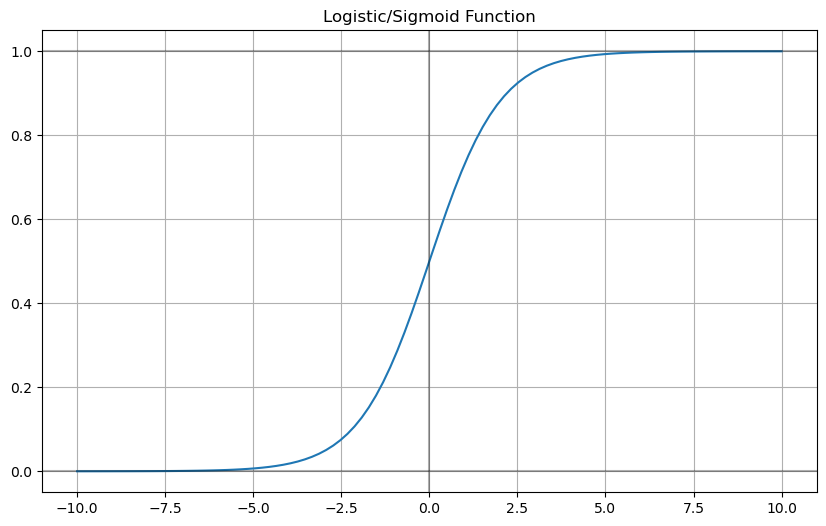

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x):
    return 1 / (1 + np.exp(-x))

# Create data points
x = np.linspace(-10, 10, 100)
y = logistic(x)

# Plot the logistic function
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Logistic/Sigmoid Function')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axhline(y=1, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)